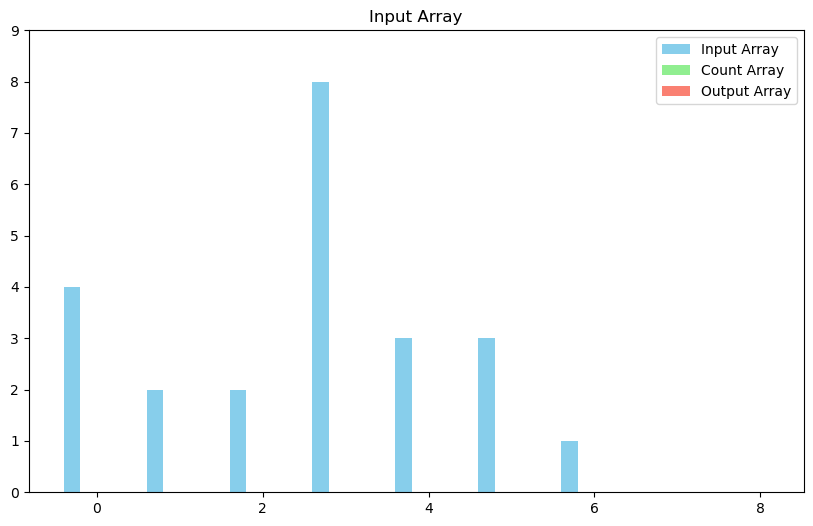

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# 입력 배열
arr = [4, 2, 2, 8, 3, 3, 1]

# 최대값 찾기
max_val = max(arr)

# 카운트 배열 초기화
count = [0] * (max_val + 1)

# 출력 배열 초기화
output = [0] * len(arr)

# 애니메이션으로 프레임 저장 리스트
frames = []

# 단계 1 : 입력 배열 시각화
frames.append(('Input Array', arr.copy(), count.copy(), output.copy()))

# 단계 2 : 카운트 배열 생성
for num in arr:
    count[num] += 1
    frames.append((f'Count Array Update: {num}', arr.copy(), count.copy(), output.copy()))

# 단계 3 : 누적 합 계산
for i in range(1, len(count)):
    count[i] += count[i - 1]
    frames.append((f'Cumulative Sum: Index {i}', arr.copy(), count.copy(), output.copy()))

# 단계 4 : 출력 배열 생성
for num in reversed(arr):
    index = count[num] - 1
    output[index] = num
    count[num] -= 1
    frames.append((f'Output Array Update: {num}', arr.copy(), count.copy(), output.copy()))

# 애니메이션 업데이트 함수
def update(frame):
    title, arr_vals, count_vals, output_vals = frame
    ax.clear()
    ax.set_title(title)
    ax.set_ylim(0, max(arr + count_vals + output_vals) + 1)

    # 입력 배열 시각화
    ax.bar([i - 0.3 for i in range(len(arr_vals))], arr_vals, width=0.2, label='Input Array', color='skyblue')

    # 카운트 배열 시각화
    ax.bar([i for i in range(len(count_vals))], count_vals, width=0.2, label='Count Array', color='lightgreen')

    # 출력 배열 시각화
    ax.bar([i + 0.3 for i in range(len(output_vals))], output_vals, width=0.2, label='Output Array', color='salmon')

    ax.legend()

# 애니메이션 생성
fig, ax = plt.subplots(figsize=(10, 6))
anim = animation.FuncAnimation(fig, update, frames=frames, interval=1000, repeat=False)

# html로 출력
HTML(anim.to_html5_video())
